<a href="https://colab.research.google.com/github/DevNicque/pos-datascience/blob/modulo_7/AndreaSilva_regressaoSimples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear Simples

## Objetivo

Construir um modelo de Machine Learning que seja capaz de fazer previsões sobre a taxa média de ocupação de casas na região de Boston, EUA, por proprietários. A variável a ser prevista é um valor numérico que representa a mediana da taxa de ocupação das casas em Boston.

## Dataset 

Boston Housing Dataset, que é um conjunto de dados que tem a taxa média de ocupação das casas, juntamente com outras 13 variáveis que podem estar relacionadas aos preços das casas. Esses são os fatores como condições socioeconômicas, condições ambientais, instalações educacionais e alguns outros fatores semelhantes. Existem 506 observações nos dados para 14 variáveis. Existem 12 variáveis numéricas em nosso conjunto de dados e 1 variável categórica. O objetivo é construir um modelo de regressão linear para estimar a taxa média de ocupação das casas pelos proprietários em Boston.

## Informações do Dataset

Características do Dataset: Multivariado <br>
Número de instâncias: 506 <br>
Número de atributos: 14 <br>
Valores faltando: Não <br>
Características dos atributos: categórico, inteiro e real <br>
Origem: StatLib library que é mantido pela Universidade de Carnegie Mellon

Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

1. CRIM: per capita crime rate by town                                        (taxa de criminalidade per capita na cidade )
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. (proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. )
3. INDUS: proportion of non-retail business acres per town (proporção de acres de negócios não varejistas por cidade )
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) (Variável dummy de Charles River (= 1 se a área limita o rio; 0 caso contrário))
5. NOX: nitric oxides concentration (parts per 10 million) (concentração de óxidos nítricos (partes por 10 milhões) )
6. RM: average number of rooms per dwelling (número médio de quartos por habitação)
7. AGE: proportion of owner-occupied units built prior to 1940 (proporção de unidades ocupadas pelo proprietário construídas antes de 1940 )
8. DIS: weighted distances to five Boston employment centres (distâncias ponderadas até cinco centros de empregos de Boston )
9. RAD: index of accessibility to radial highways (índice de acessibilidade a rodovias radiais )
10. TAX: full-value property-tax rate per 10,000 (valor total da taxa de imposto sobre a propriedade por 10.000 )
11. PTRATIO: pupil-teacher ratio by town (proporção aluno-professor por cidade )
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town (1000 (Bk - 0,63) ^ 2, onde Bk é a proporção de negros por cidade )
13. LSTAT: % lower status of the population (% de status inferior da população )
14. TARGET: Median value of owner-occupied homes in 1000 dolarés (Valor médio das casas ocupadas pelo proprietário em US $ 1.000 )

In [22]:
# Carregando o Dataset Boston Houses
from sklearn.datasets import load_boston
boston = load_boston() 

# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

## Análise Exploratória

In [93]:
# Convertendo o dataset em um dataframe com Pandas
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset['target'] = boston.target

In [94]:
dataset.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [95]:
# Calculando a média da variável de resposta
valor_medio_esperado_na_previsao = dataset['target'].mean()

In [96]:
valor_medio_esperado_na_previsao

22.532806324110698

In [97]:
# Calculando (simulando) o SSE
# O SSE é a diferença ao quadrado entre o valor previsto e o valor observado.
# Considerando que o valor previsto seja igual a média, podemos considerar que 
# y = média da variável target (valores observados).

# Estamos apenas simulando o SSE, uma vez que a regressão ainda não foi criada e os valores previstos 
# ainda não foram calculados.

squared_errors = pd.Series(valor_medio_esperado_na_previsao - dataset['target'])**2 
SSE = np.sum(squared_errors)
print ('Soma dos Quadrados dos Erros (SSE): %01.f' % SSE)

Soma dos Quadrados dos Erros (SSE): 42716


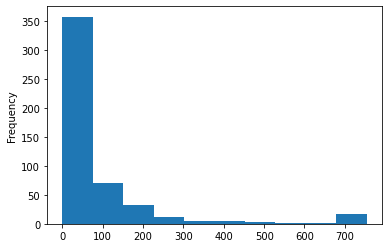

In [98]:
# Histograma dos erros
# Temos mais erros "pequenos", ou seja, mais valores próximos à média.
hist_plot = squared_errors.plot(kind='hist')

In [99]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


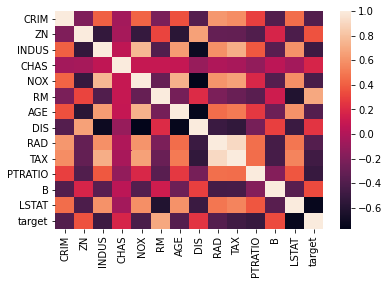

In [100]:
sns.heatmap(dataset.corr())

Para Regressão Linear Simples usaremos como variável explanatória a variável ZN que representa a proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados por ser a segunda variável a ter maior correlação com a variável target.

In [101]:
# Função para calcular o desvio padrão
def calc_desvio_padrao(variable, bias = 0):
    observations = float(len(variable))
    return np.sqrt(np.sum((variable - np.mean(variable))**2) / (observations - min(bias, 1)))

In [102]:
# Imprimindo o desvio padrão via fórmula e via NumPy da variável ZN
print ('Resultado da Função: %0.5f Resultado do Numpy: %0.5f' % (calc_desvio_padrao(dataset['ZN']), np.std(dataset['ZN'])))

Resultado da Função: 23.29940 Resultado do Numpy: 23.29940


In [103]:
# Funções para calcular a variância da variável ZN e a correlação com a variável target
def covariance(variable_1, variable_2, bias = 0):
    observations = float(len(variable_1))
    return np.sum((variable_1 - np.mean(variable_1)) * (variable_2 - np.mean(variable_2))) / (observations - min(bias,1))

def standardize(variable):
    return (variable - np.mean(variable)) / np.std(variable)

def correlation(var1, var2, bias = 0):
    return covariance(standardize(var1), standardize(var2), bias)

In [104]:
# Compara o resultado das nossas funções com a função pearsonr do SciPy
from scipy.stats.stats import pearsonr
print ('Nossa estimativa de Correlação: %0.5f' % (correlation(dataset['ZN'], dataset['target'])))
print ('Correlação a partir da função pearsonr do SciPy: %0.5f' % pearsonr(dataset['ZN'], dataset['target'])[0])

Nossa estimativa de Correlação: 0.36045
Correlação a partir da função pearsonr do SciPy: 0.36045


In [105]:
# Definindo o range dos valores de x e y
x_range = [dataset['ZN'].min(),dataset['ZN'].max()]
y_range = [dataset['target'].min(),dataset['target'].max()]

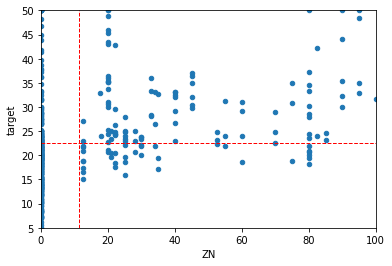

In [106]:
# Plot dos valores de x e y com a média
scatter_plot = dataset.plot(kind = 'scatter', x = 'ZN', y = 'target', xlim = x_range, ylim = y_range)

# Cálculo da média
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(),dataset['target'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([dataset['ZN'].mean(), dataset['ZN'].mean()], y_range, '--', color = 'red', linewidth = 1)

## Regressão Linear com Statsmodels

https://www.statsmodels.org/stable/index.html

In [81]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [107]:
# Definição dos valores de x e y
num_observ = len(dataset)
X = dataset['ZN']
Y = dataset['target']

In [108]:
model = sm.OLS(Y,X)
res = model.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.279
Model:                            OLS   Adj. R-squared (uncentered):              0.278
Method:                 Least Squares   F-statistic:                              195.5
Date:                Fri, 11 Jun 2021   Prob (F-statistic):                    8.88e-38
Time:                        06:23:48   Log-Likelihood:                         -2250.3
No. Observations:                 506   AIC:                                      4503.
Df Residuals:                     505   BIC:                                      4507.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- O modelo está calculando um único coenficiente, que é a variável ZN, sendo este o coenficiente angular que apresentou valor de 0.4959 e o desvio padrão de  0.035.
- Porém somente o coeficiente angular não é suficiente, é necessário calcular o coenficiente linear - interceptor.

**Inserindo um interceptor**

In [109]:
X = sm.add_constant(X)

In [110]:
model2 = sm.OLS(Y,X)
res2 = model2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     75.26
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           5.71e-17
Time:                        06:24:21   Log-Likelihood:                -1805.0
No. Observations:                 506   AIC:                             3614.
Df Residuals:                     504   BIC:                             3623.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.9176      0.425     49.248      0.0

In [111]:
coef_linear, coef_angular = res2.params

In [112]:
reta = coef_angular * X + coef_linear

In [124]:
X = X['ZN']
reta = reta['ZN']

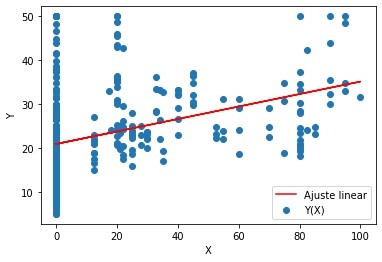

In [125]:
plt.scatter(X,Y,label='Y(X)')
plt.plot(X,reta,label='Ajuste linear', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [126]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(Y,reta)
RMSE = np.sqrt(mean_squared_error(Y,reta))

print("MAE = {:0.2f}".format(MAE))
print("RMSE = {:0.2f}".format(RMSE))

MAE = 6.06
RMSE = 8.57


Analisando o RMSE é possível observar que os pontos estão distantes da reta
ficando geralmente 8.57 distante da reta. Isso é ruim, pois demostra que o modelo está errando mais que acertando e que a variável ZN não é melhor variável preditora.